In [14]:
from googletrans import Translator
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import os

In [3]:
# Load the dataset
df = pd.read_excel('concatenated_data_without_duplicate.xlsx')
df.head()

,Name,X,Y,addr_city,addr_street,amenity,beds,changeset_id,changeset_timestamp,changeset_user,changeset_version,completeness,dispensing,osm_id,osm_type,uuid,geometry
0,NaN,32.536015,15.632537,NaN,NaN,pharmacy,NaN,59859075.0,2018-06-14 20:48:56,allasafieldin,1.0,12.0,yes,5691668660,node,62a1f69b5e464b3a831724e7e633b9f7,NaN
1,NaN,NaN,NaN,NaN,NaN,hospital,NaN,82920351.0,2020-04-01 11:29:56,AARod,1.0,9.0,NaN,786505555,way,6bed7ba76fdc43f2a959908df295b6c8,NaN
2,NaN,32.533961,15.528663,NaN,NaN,pharmacy,NaN,30685807.0,2015-05-01 09:28:35,AhmedSDN,1.0,6.0,NaN,3490668393,node,516a03ec3daf43e68f01ca8c8564d169,NaN
3,Wad Musa Pharmacy,32.441141,15.683439,NaN,NaN,pharmacy,NaN,89779217.0,2020-08-22 12:03:41,ImadJ,1.0,15.0,yes,7834704444,node,77c5b490089945198e0cfa5b45bd5c6b,NaN
4,NaN,NaN,NaN,NaN,NaN,hospital,NaN,61428897.0,2018-08-07 09:45:25,ali-hasboo,1.0,12.0,NaN,614753021,way,5888223145234835bd0211b5475c0469,NaN


In [4]:
#translate names to English (without language detection)
translator = Translator()

def translate_to_english(name):
    try:
        if isinstance(name, str):
            return translator.translate(name, src='auto', dest='en').text
        return name
    except:
        return name  

df['Name'] = df['Name'].apply(translate_to_english)

C:\Users\satad\AppData\Local\Temp\ipykernel_14764\974134767.py:10: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  return name


C:\Users\satad\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\satad\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


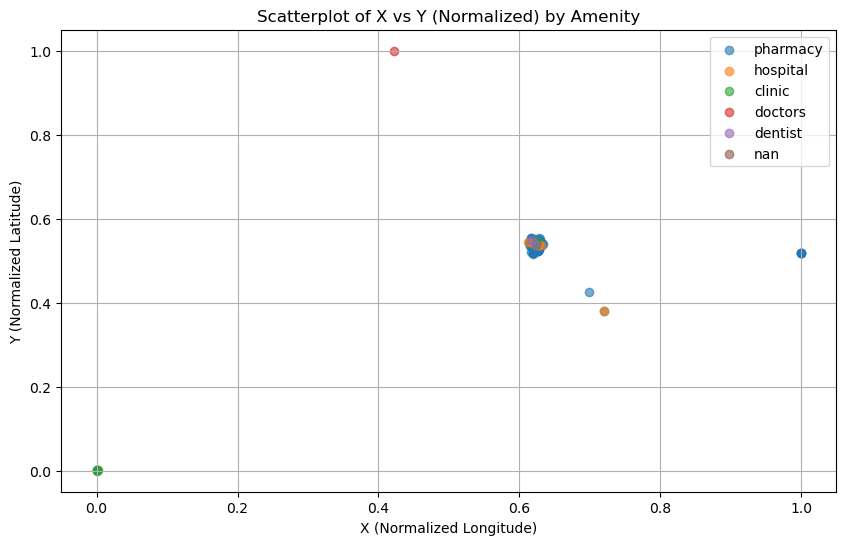

In [30]:
#normalize the values
#numeric columns for normalization
numeric_columns = ['X', 'Y', 'beds', 'completeness']
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

#scatterplot
#scatterplot of X vs Y, color-coded by amenity type
plt.figure(figsize=(10, 6))
for amenity in df['amenity'].unique():
    subset = df[df['amenity'] == amenity]
    plt.scatter(subset['X'], subset['Y'], label=amenity, alpha=0.6)

plt.title('Scatterplot of X vs Y (Normalized) by Amenity')
plt.xlabel('X (Normalized Longitude)')
plt.ylabel('Y (Normalized Latitude)')
plt.legend()
plt.grid(True)

#save the plot as an image
plt.savefig('scatterplot.png', dpi=300)
plt.show()

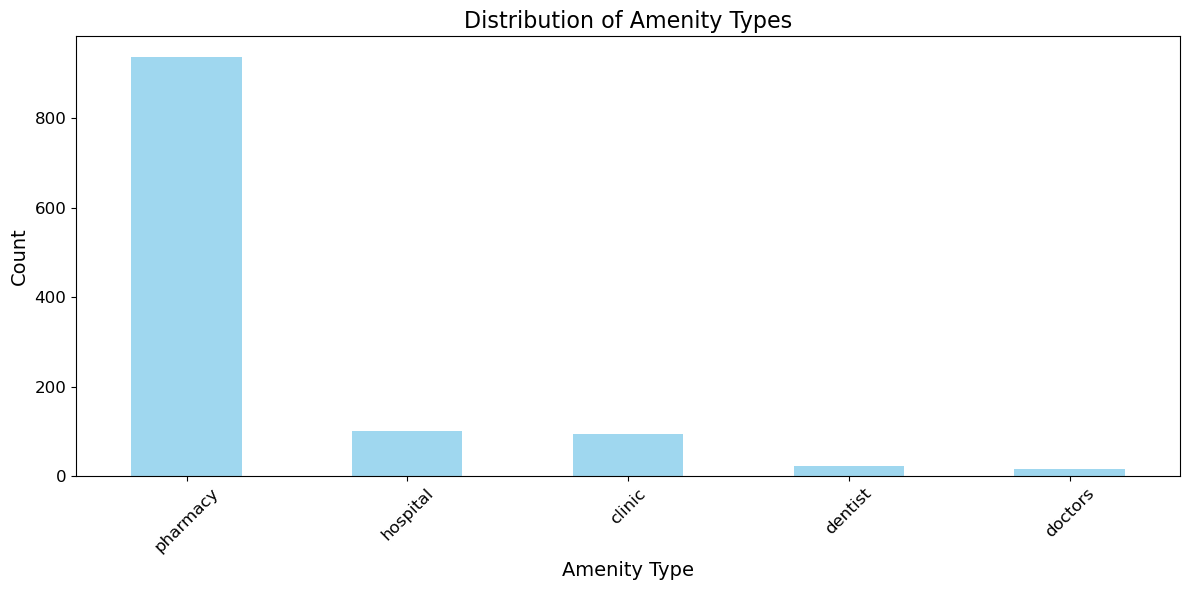

Bar chart saved as 'amenity_distribution.png'


In [6]:
#count the occurrences of each amenity type in the dataset
amenity_counts = df['amenity'].value_counts()

#plot a bar chart for the distribution of amenities
plt.figure(figsize=(12, 6))
amenity_counts.plot(kind='bar', color='skyblue', alpha=0.8)

#add titles and labels
plt.title('Distribution of Amenity Types', fontsize=16)
plt.xlabel('Amenity Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

#save the plot as an image
output_path = 'amenity_distribution.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')  # Save with high resolution

#display the plot
plt.show()

print(f"Bar chart saved as '{output_path}'")

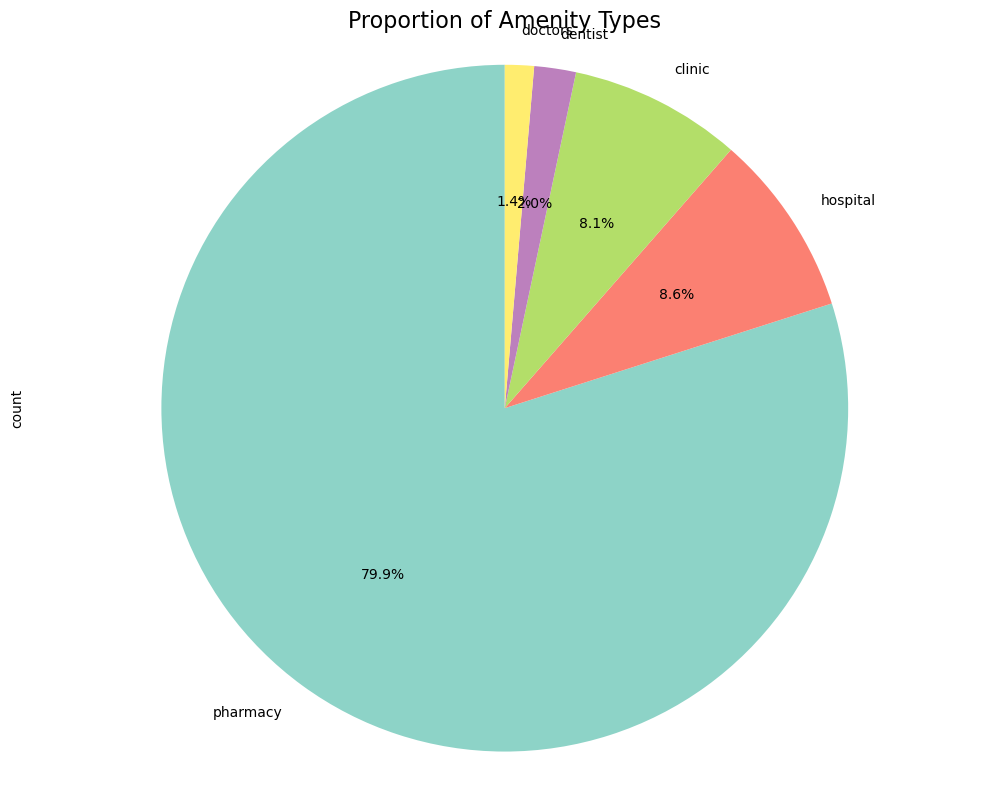

Pie chart saved as 'amenity_distribution_pie_chart.png'


In [32]:
#count the occurrences of each amenity type in the dataset
amenity_counts = df['amenity'].value_counts()

#create a pie chart for the distribution of amenity types
plt.figure(figsize=(10, 8))
amenity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Set3')

#add title
plt.title('Proportion of Amenity Types', fontsize=16)

#ensure the pie is a circle
plt.axis('equal')

#save the plot as an image
output_path = 'amenity_distribution_pie_chart.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300, bbox_inches='tight')

#show the chart
plt.show()

print(f"Pie chart saved as '{output_path}'")

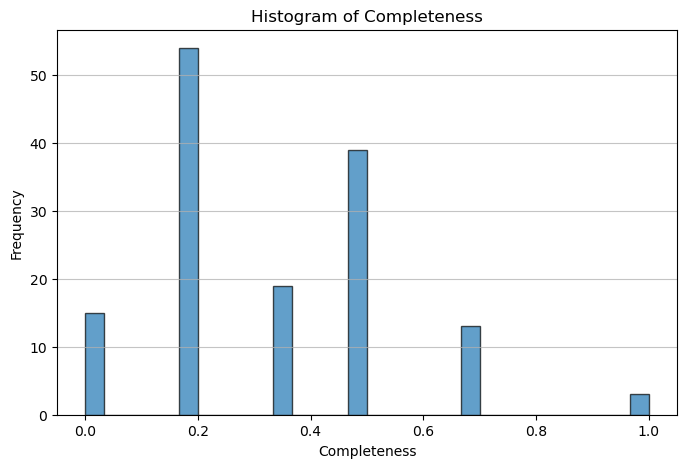

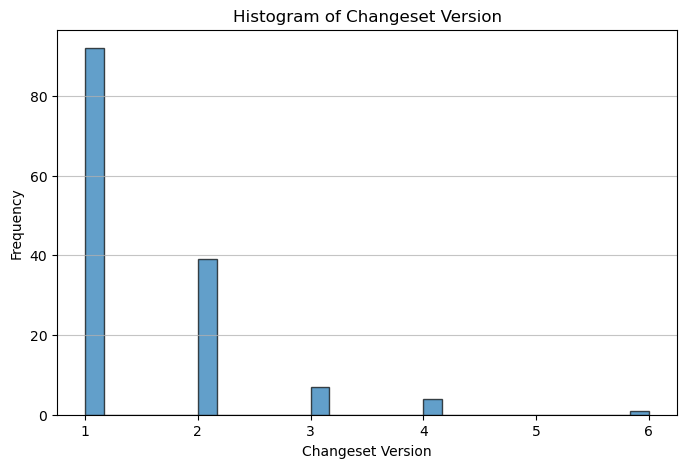

Histograms saved as 'histogram_completeness.png' and 'histogram_changeset_version.png'


In [31]:
#create and save the histogram for 'completeness'
plt.figure(figsize=(8, 5))
plt.hist(df['completeness'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Completeness")
plt.xlabel("Completeness")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.savefig('histogram_completeness.png')
plt.show()

#create and save the histogram for 'changeset_version'
plt.figure(figsize=(8, 5))
plt.hist(df['changeset_version'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Changeset Version")
plt.xlabel("Changeset Version")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.savefig('histogram_changeset_version.png')
plt.show()

print("Histograms saved as 'histogram_completeness.png' and 'histogram_changeset_version.png'")

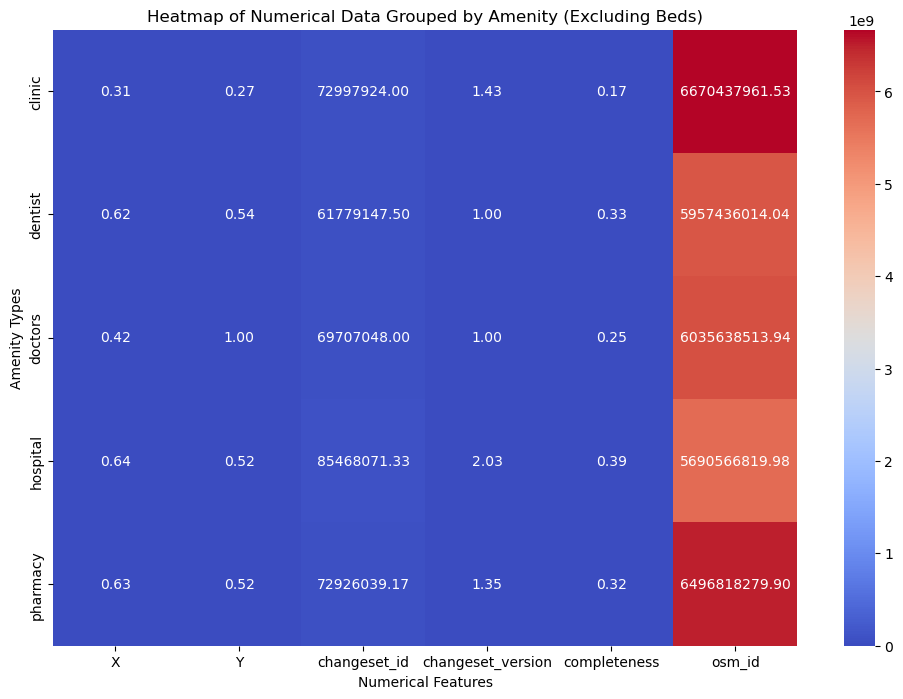

In [34]:
#grouping data by 'amenity' and calculating the mean of numerical values
amenity_numerical_data = df.groupby('amenity').mean(numeric_only=True)

#remove the 'beds' column from the analysis
amenity_numerical_data_filtered = amenity_numerical_data.drop(columns=['beds'], errors='ignore')

#create a heatmap for the filtered data
plt.figure(figsize=(12, 8))
sns.heatmap(amenity_numerical_data_filtered, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Numerical Data Grouped by Amenity (Excluding Beds)")
plt.xlabel("Numerical Features")
plt.ylabel("Amenity Types")
plt.savefig('Heatmap of Numerical Data Grouped by Amenity.png')
plt.show()

In [26]:
def transliterate_arabic_to_english(name):
    # Dictionary mapping Arabic letters to approximate English letters
    arabic_to_english = {
        'ا': 'a', 'ب': 'b', 'ت': 't', 'ث': 'th', 'ج': 'j', 'ح': 'h', 'خ': 'kh',
        'د': 'd', 'ذ': 'dh', 'ر': 'r', 'ز': 'z', 'س': 's', 'ش': 'sh', 'ص': 's',
        'ض': 'd', 'ط': 't', 'ظ': 'z', 'ع': 'a', 'غ': 'gh', 'ف': 'f', 'ق': 'q',
        'ك': 'k', 'ل': 'l', 'م': 'm', 'ن': 'n', 'ه': 'h', 'و': 'w', 'ي': 'y',
        'ء': "'", 'ئ': "'", 'ؤ': "'", 'إ': 'i', 'أ': 'a', 'آ': 'aa', 'ة': 'h'
    }

    # Transliterate the name
    transliterated_name = ''.join([arabic_to_english.get(char, char) for char in name])
    return transliterated_name

# Apply transliteration to the 'addr_city' column
if 'addr_city' in df.columns:
    df['addr_city_transliterated'] = df['addr_city'].apply(lambda x: transliterate_arabic_to_english(x) if pd.notnull(x) else x)

# Display the updated dataset
df[['addr_city', 'addr_city_transliterated']].head()

,addr_city,addr_city_transliterated
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [27]:
df.to_excel('concatenated_data_with_addr_city_translted.xlsx', index=False)

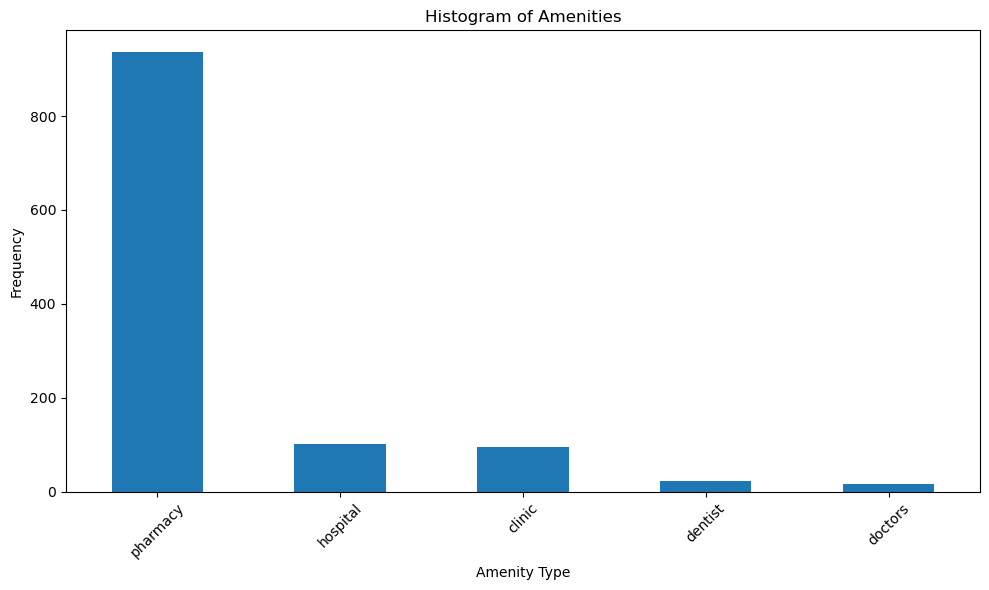

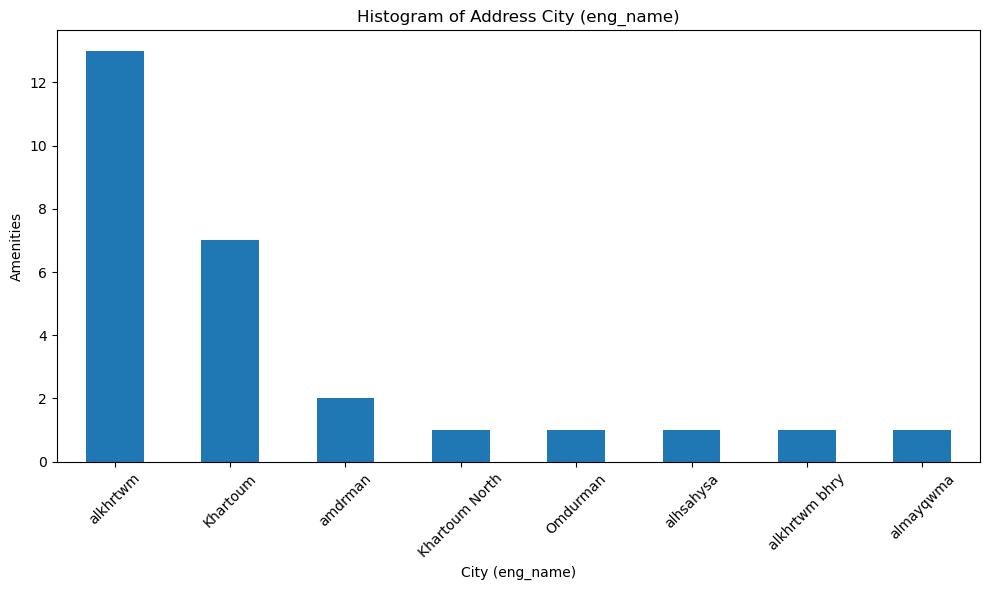

Histograms have been saved:
Amenities Histogram: /path/to/save/amenities_histogram.png
Address City (eng_name) Histogram: /path/to/save/addr_city_transliterated_histogram.png


In [38]:
#replace with desired save location
#amenities_histogram_path = '/path/to/save/amenities_histogram.png'

#replace with desired save location
#addr_city_histogram_path = '/path/to/save/addr_city_transliterated_histogram.png'

#histogram for 'amenity' column
plt.figure(figsize=(10, 6))
df['amenity'].value_counts().plot(kind='bar')
plt.title('Histogram of Amenities')
plt.xlabel('Amenity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('amenities_histogram_path.png')  
plt.show()

#histogram for 'addr_city_transliterated' column
plt.figure(figsize=(10, 6))
df['addr_city_transliterated'].value_counts().plot(kind='bar')
plt.title('Histogram of Address City (eng_name)')
plt.xlabel('City (eng_name)')
plt.ylabel('Amenities')
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('addr_city_histogram_path.png')  
plt.show()

print("Histograms have been saved:")
print(f"Amenities Histogram: {amenities_histogram_path}")
print(f"Address City (eng_name) Histogram: {addr_city_histogram_path}")


In [41]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


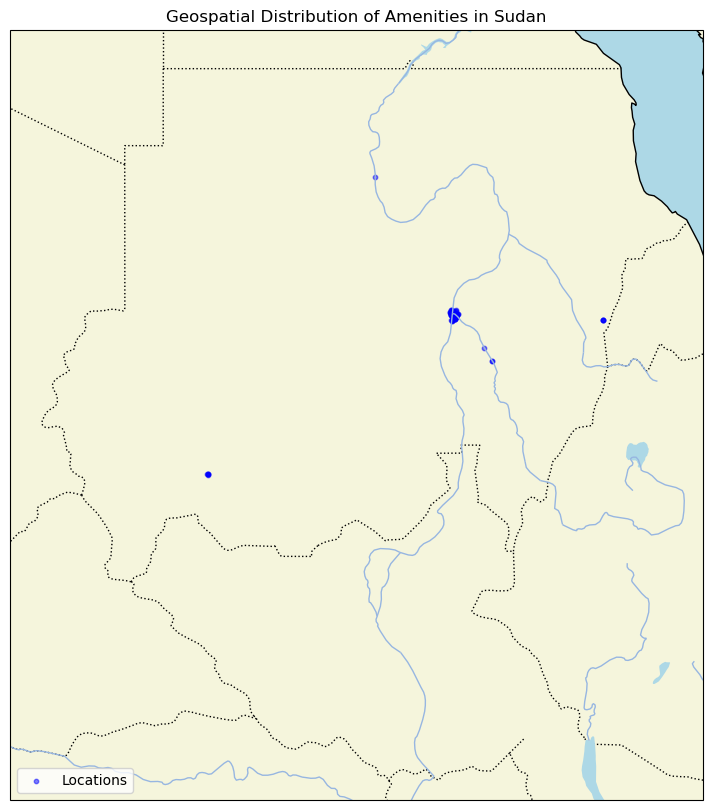

In [43]:
df = pd.read_excel('concatenated_data_without_duplicate.xlsx')
#filter data to ensure valid coordinates (excluding zeros)
filtered_df = df[(df['X'] != 0) & (df['Y'] != 0)]

#set up the map of Sudan
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

#add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, facecolor='beige')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

#define the extent to focus on Sudan
ax.set_extent([21, 39, 3, 23], crs=ccrs.PlateCarree())

#plot the points
plt.scatter(filtered_df['X'], filtered_df['Y'], c='blue', alpha=0.5, s=10, label='Locations', transform=ccrs.PlateCarree())

#add title and legend
plt.title('Geospatial Distribution of Amenities in Sudan')
plt.legend(loc='lower left')

#save the map as an image file
output_path = 'sudan_geospatial_map.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight') 

plt.show()


Columns in DataFrame: Index(['Name', 'X', 'Y', 'addr_city', 'addr_street', 'amenity', 'beds',
       'changeset_id', 'changeset_timestamp', 'changeset_user',
       'changeset_version', 'completeness', 'dispensing', 'osm_id', 'osm_type',
       'uuid', 'geometry'],
      dtype='object')


C:\Users\satad\AppData\Local\Temp\ipykernel_14764\3223775717.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.resample('M').size()


Figure saved successfully at: Monthly_Trends_in_Changesets.png


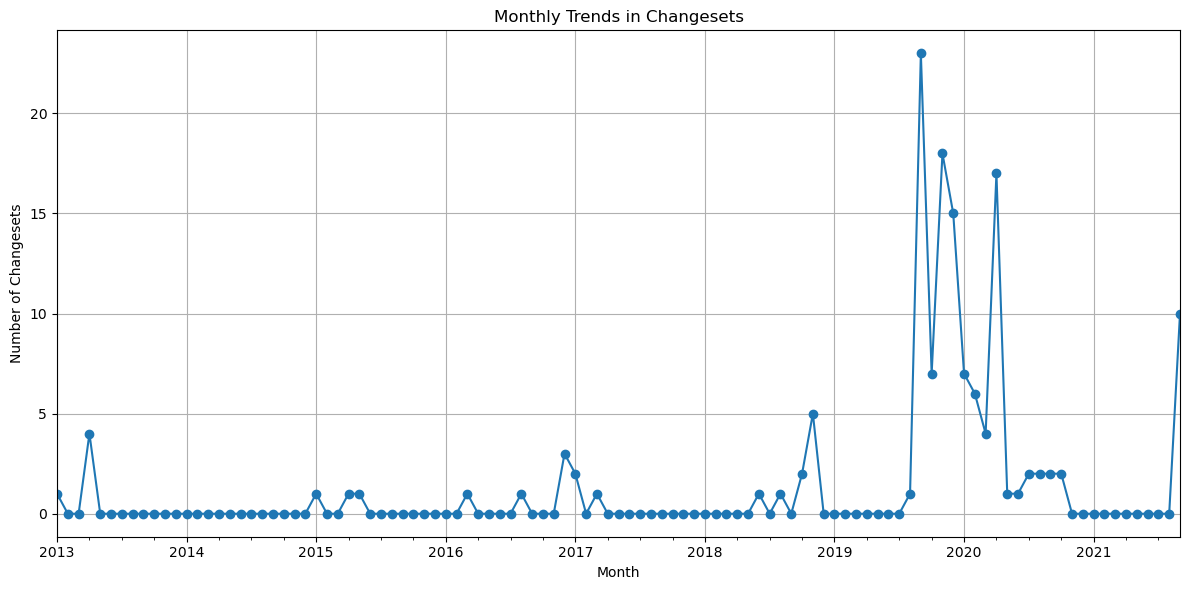

In [52]:
df = pd.read_excel('concatenated_data_without_duplicate.xlsx')

#ensure the DataFrame is loaded correctly
try:
    print("Columns in DataFrame:", df.columns)
except NameError:
    raise ValueError("The DataFrame 'df' is not defined. Ensure it is loaded before running this code.")

#check if 'changeset_timestamp' exists in the DataFrame
if 'changeset_timestamp' not in df.columns:
    print("The 'changeset_timestamp' column is not found in the DataFrame. Available columns:")
    print(df.columns)
    raise KeyError("'changeset_timestamp' column is missing. Please verify the column name or data source.")

#ensure the 'changeset_timestamp' column is in datetime format
df['changeset_timestamp'] = pd.to_datetime(df['changeset_timestamp'], errors='coerce')

#drop rows with invalid or missing timestamps
df = df.dropna(subset=['changeset_timestamp'])

#ensure the DataFrame is not empty after dropping invalid timestamps
if df.empty:
    print("The DataFrame is empty after dropping invalid timestamps. Exiting.")
else:
    #set the 'changeset_timestamp' column as the DataFrame index
    df.set_index('changeset_timestamp', inplace=True)

    #verify the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("Index is not a DatetimeIndex. Please check the data.")

    #resample data by month and count the number of occurrences
    monthly_counts = df.resample('M').size()

    #plot the time-series trend
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(kind='line', marker='o')
    plt.title('Monthly Trends in Changesets')
    plt.xlabel('Month')
    plt.ylabel('Number of Changesets')
    plt.grid()
    plt.tight_layout()

    #save the figure
    save_path = 'Monthly_Trends_in_Changesets.png'
    try:
        plt.savefig(save_path)
        print(f"Figure saved successfully at: {save_path}")
    except Exception as e:
        print(f"Error saving the figure: {e}")

    plt.savefig('addr_city_histogram_path.png')
    plt.show()
